In [1]:
import pandas as pd

In [2]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [3]:
os.getcwd()

'C:\\Users\\Serg\\Untitled Folder'

In [4]:
os.chdir(r"C:\Users\Serg\Desktop\Python")

In [5]:
transactions = pd.read_excel("KPMG_VI.xlsx",sheet_name="Transactions", index_col = 0,header=1)

In [6]:
transactions.head()


,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
transaction_id,,,,,,,,,,,,
1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


<AxesSubplot:ylabel='transaction_id'>

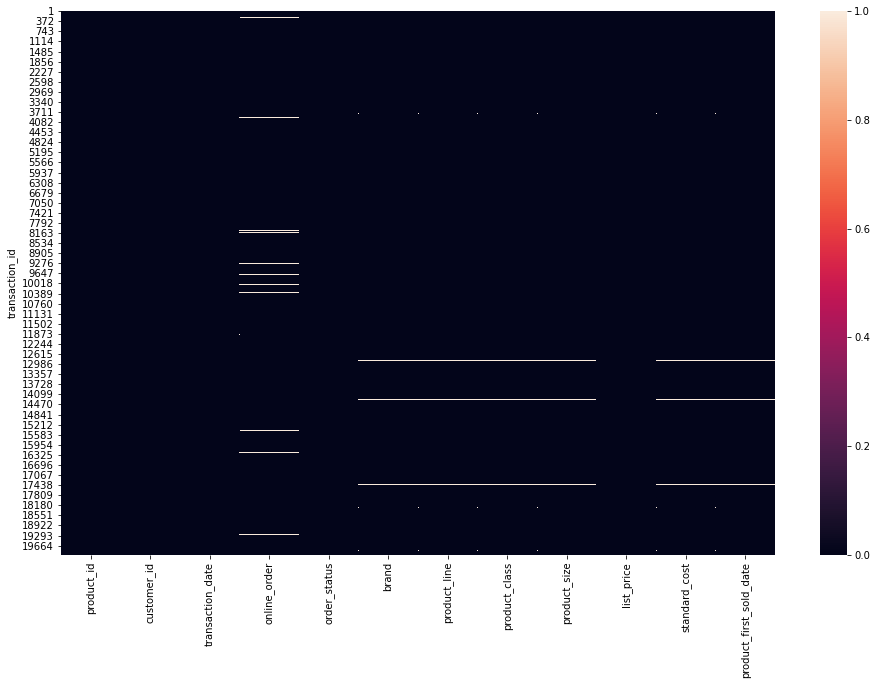

In [7]:
plt.figure(figsize=(16,10))
sns.heatmap(transactions.isnull())

In [8]:
transactions = transactions.dropna()

In [9]:
transactions["profit"] = transactions["list_price"] - transactions["standard_cost"]


In [10]:
transactions = transactions.drop(["list_price","standard_cost","order_status","product_first_sold_date"], axis = 1 )

# Checking if online orders are more pfrofitabe than offline

In [11]:
#Checking if online orders are more pfrofitabe than offline
pd.set_option('display.float_format', lambda x: '%.2f' % x)
transactions[["online_order","profit"]].groupby("online_order").sum()

,profit
online_order,
0.00,5387899.64
1.00,5340916.69


Text(0, 0.5, 'Profit')

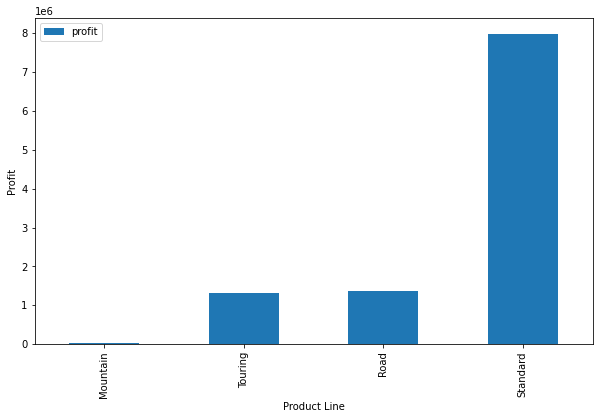

In [14]:
transactions[["product_line","profit"]].groupby("product_line").sum().sort_values("profit").plot(kind = "bar",figsize = (10,6))
plt.xlabel("Product Line")
plt.ylabel("Profit")

# Checking what brand is most profitable

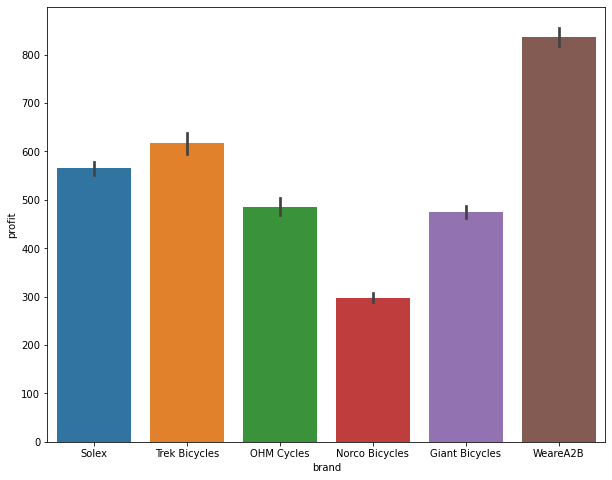

In [15]:
#checking what brand is most profitable
pd.set_option('display.float_format', lambda x: '%.2f' % x)
plt.figure(figsize=(10,8))
_=sns.barplot(x="brand",y="profit", data = transactions)

In [16]:
demographics = pd.read_excel("KPMG_VI.xlsx",sheet_name="CustomerDemographic", index_col = 0,header=1)

In [17]:
demographics.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
customer_id,,,,,,,,,,,,
1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.00
2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.00
3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.00
4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.00
5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.00


In [18]:
address =  pd.read_excel("KPMG_VI.xlsx",sheet_name="CustomerAddress", index_col = 0,header=1)

In [19]:
demographics = demographics.drop(["DOB","first_name","last_name","past_3_years_bike_related_purchases","job_title","default","tenure"	],axis = 1 )

In [20]:
by_demo = pd.merge(transactions,demographics,on = "customer_id")

In [21]:
final = pd.merge(by_demo,address,on = "customer_id")
final.tail()

,product_id,customer_id,transaction_date,online_order,brand,product_line,product_class,product_size,profit,gender,job_industry_category,wealth_segment,deceased_indicator,owns_car,address,postcode,state,country,property_valuation
19411,6,2764,2017-07-03,0.00,OHM Cycles,Standard,high,medium,91.15,Female,Financial Services,Mass Customer,N,Yes,1 Wayridge Park,4301,QLD,Australia,1
19412,45,3168,2017-02-21,1.00,Solex,Standard,medium,medium,356.50,Male,Health,Affluent Customer,N,No,88 Rutledge Crossing,4215,QLD,Australia,7
19413,83,3168,2017-04-11,0.00,Solex,Touring,medium,large,1408.91,Male,Health,Affluent Customer,N,No,88 Rutledge Crossing,4215,QLD,Australia,7
19414,3,3168,2017-06-03,0.00,Trek Bicycles,Standard,medium,large,1702.55,Male,Health,Affluent Customer,N,No,88 Rutledge Crossing,4215,QLD,Australia,7
19415,3,3168,2017-09-30,0.00,Trek Bicycles,Standard,medium,large,1702.55,Male,Health,Affluent Customer,N,No,88 Rutledge Crossing,4215,QLD,Australia,7


In [22]:
final["state"] = final["state"].replace({'New South Wales':"NSW","Queensland":"QLD","Victoria":"VIC"})

In [23]:
final = final.dropna()

# Finding most profitable states and putting them on a map

In [108]:
by_state= final[["profit","state",]].groupby("state",as_index = False).sum()

In [122]:
by_state.head()

,state,profit
0,NSW,4762838.61
1,QLD,1956714.42
2,VIC,2260306.37


In [123]:
import folium

In [242]:

m = folium.Map([-26.4390917,133.281323])

In [243]:
#to use folium we need longitude and latitute of the states 

In [244]:
long = {145.612793:"NSW",142.702789:"QLD",144.964600:"VIC"}
lat = {-31.840233:"NSW",-20.917574:"QLD",-37.020100:"VIC"}

In [245]:
by_state["long"] = long
by_state["lat"] = lat

In [246]:
by_state

,state,profit,long,lat
0,NSW,4762838.61,145.61,-31.84
1,QLD,1956714.42,142.70,-20.92
2,VIC,2260306.37,144.96,-37.02


In [247]:
for index, row in by_state.iterrows():
  
    
    folium.Circle(location=[row['lat'], row['long']],
        popup= 'Profit:' +str(row['profit']),
        tooltip=row['state'],
        color="darkred",
        fill=True,
        radius = row["profit"]/40,
        fill_color="lighred").add_to(m)


In [248]:
m